## Compressão de imagens  

**Importação das biblitoecas**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import pickle
import zipfile
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

**Carregamento da base de dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/traffic-signs-data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/train.p",
          mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/valid.p",
          mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/test.p",
          mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

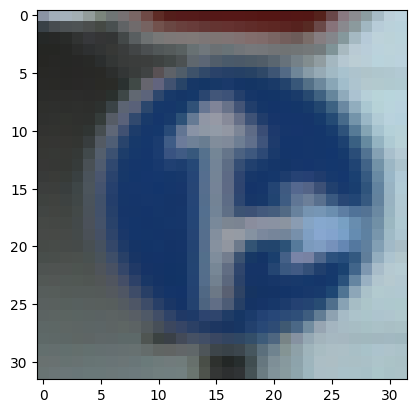

In [ ]:
plt.imshow(X_train[1104])

**Visualização dos dados**

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

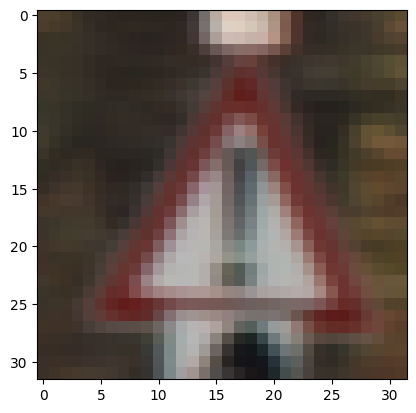

In [ ]:
i = random.randint(1,34000) 
plt.imshow( X_train[i] , cmap = 'gray')

In [ ]:
label = y_train[i]
label

18

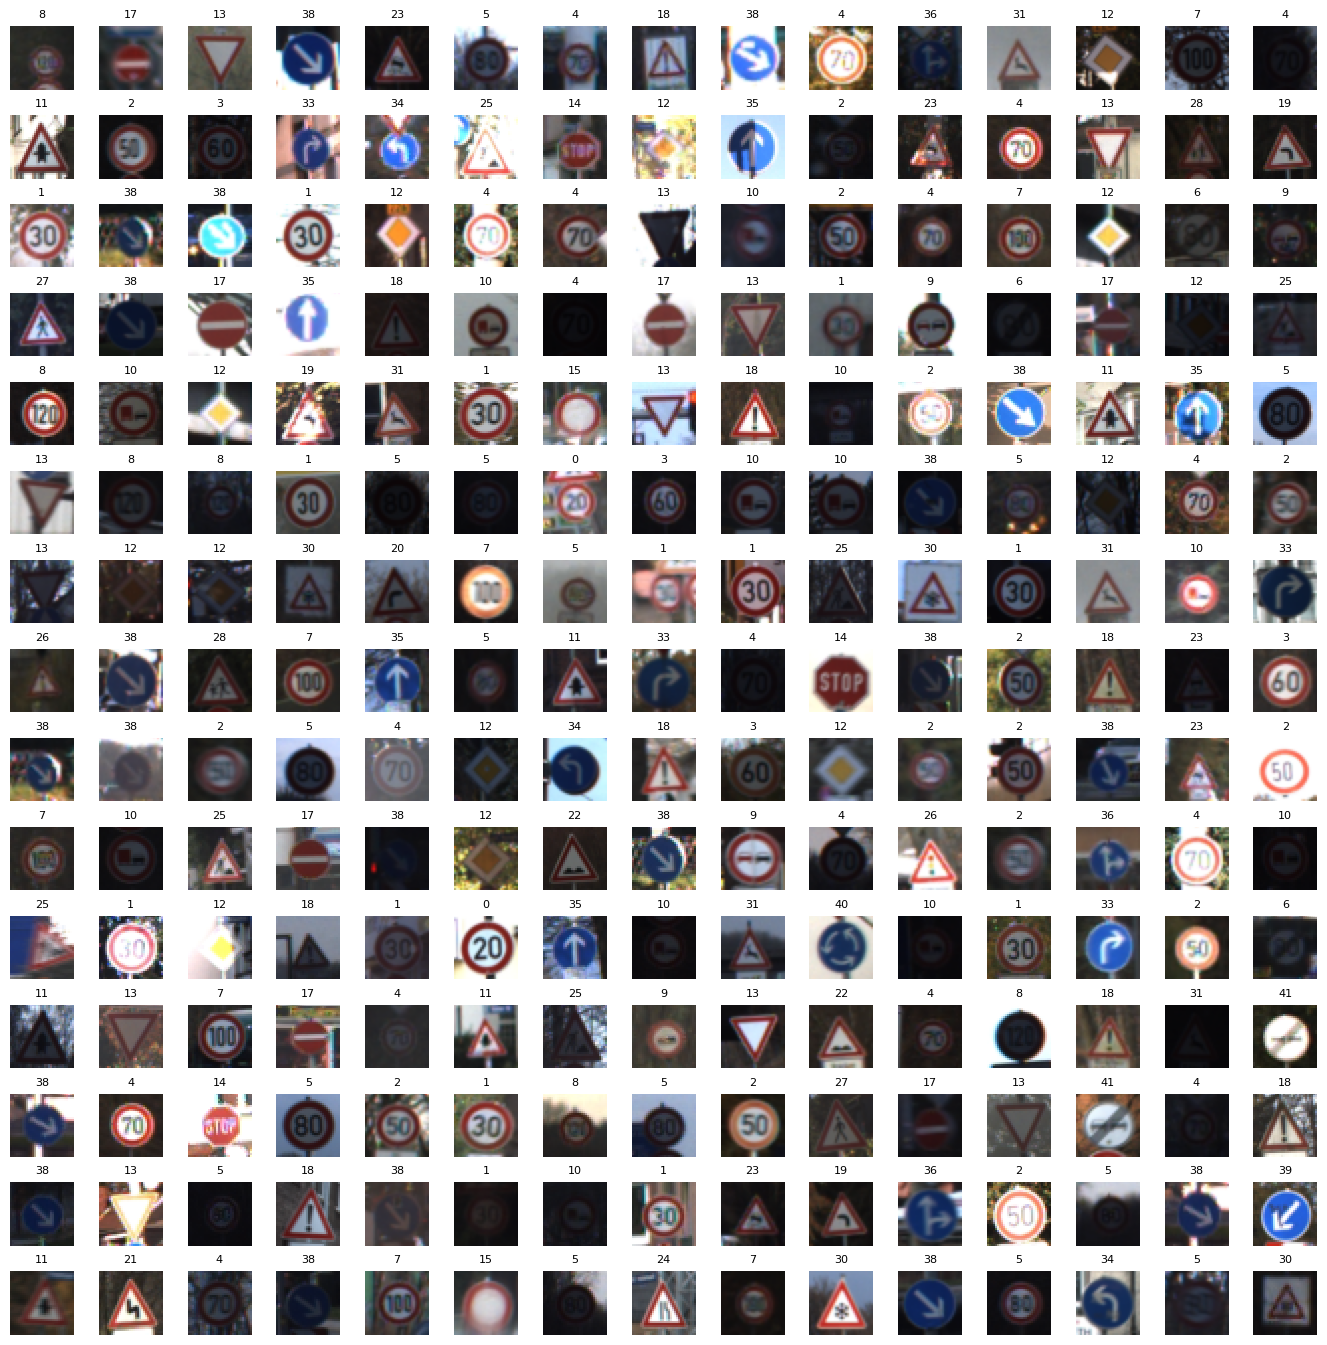

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

**Pré-processamento**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**Criação e treinamento do autoencoder**

In [ ]:
from keras.layers.reshaping.up_sampling2d import UpSampling2D
from keras.api._v2.keras.layers import BatchNormalization
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3, 3), strides = 1, padding = 'same',
                                       input_shape = (32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2, 2), padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2, 2), padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(16, (3, 3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

#Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2, 2), padding = 'same'))

#Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3, 3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3, 3), strides =1, padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3, 3), strides = 1, activation = 'sigmoid',
                                       padding = 'same'))

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', 
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 average_pooling2d_10 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_21 (Bat  (None, 16, 16, 32)      

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 200, 
          validation_data=(X_test, X_test))

Epoch 1/100
174/174 [==============================] - 5s 30ms/step - loss: 0.4666 - val_loss: 0.4676
Epoch 2/100
174/174 [==============================] - 4s 25ms/step - loss: 0.4665 - val_loss: 0.4666
Epoch 3/100
174/174 [==============================] - 4s 25ms/step - loss: 0.4663 - val_loss: 0.4741
Epoch 4/100
174/174 [==============================] - 5s 26ms/step - loss: 0.4661 - val_loss: 0.4667
Epoch 5/100
174/174 [==============================] - 5s 26ms/step - loss: 0.4660 - val_loss: 0.4708
Epoch 6/100
174/174 [==============================] - 4s 25ms/step - loss: 0.4660 - val_loss: 0.4696
Epoch 7/100
174/174 [==============================] - 4s 26ms/step - loss: 0.4658 - val_loss: 0.4705
Epoch 8/100
174/174 [==============================] - 5s 26ms/step - loss: 0.4658 - val_loss: 0.4671
Epoch 9/100
174/174 [==============================] - 4s 25ms/step - loss: 0.4656 - val_loss: 0.4688
Epoch 10/100
174/174 [==============================] - 4s 26ms/step - loss: 0.465

**Avaliação do modelo**

In [ ]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 20ms/step


In [ ]:
predicted.shape

(10, 32, 32, 3)

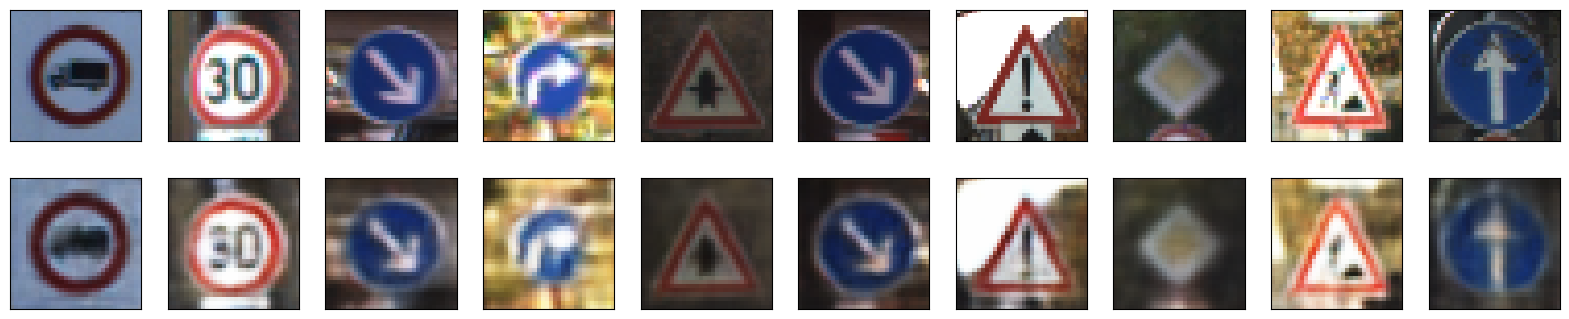

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)